## Ejemplos aplicaciones de las distribuciones de probabilidad

## Ejemplo Binomial

Un modelo de precio de opciones, el cual intente modelar el precio de un activo $S(t)$ en forma simplificada, en vez de usar ecuaciones diferenciales estocásticas. De acuerdo a este modelo simplificado, dado el precio del activo actual $S(0)=S_0$, el precio después de un paso de tiempo $\delta t$, denotado por $S(\delta t)$, puede ser ya sea $S_u=uS_0$ o $S_d=dS_0$, con probabilidades $p_u$ y $p_d$, respectivamente. Los subíndices $u$ y $p$ pueden ser interpretados como 'subida' y 'bajada', además consideramos cambios multiplicativos. Ahora imagine que el proces $S(t)$ es observado hasta el tiempo $T=n\cdot \delta t$ y que las subidas y bajadas del precio son independientes en todo el tiempo. Como hay $n$ pasos, el valor mas grande de $S(T)$ alcanzado es $S_0u^n$ y el valor más pequeño es $S_0d^n$. Note que valores intermedios serán de la forma $S_0u^md^{n-m}$ donde $m$ es el número de saltos de subidas realizadas por el activo y $n-m$ el número bajadas del activo. Observe que es irrelevante la secuencia exacta de subidas y bajadas del precio para determinar el precio final, es decir como los cambios multiplicativos conmutan: $S_0ud=S_0du$. Un simple modelo como el acá propuesto, puede representarse mediante un modelo binomial y se puede representar de la siguiente forma:
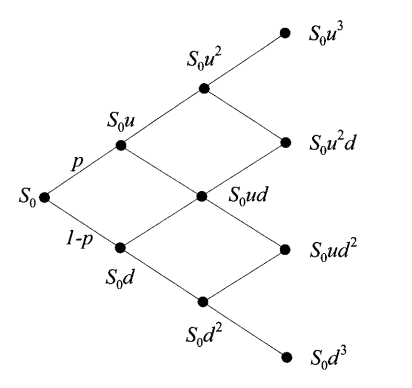

Tal modelo es un poco conveniente para simples opciones de dimensión baja debido a que **(el diagrama puede crecer exponencialmente)**, cuando las recombinaciones mantienen una complejidad baja. Con este modelo podíamos intentar  responder 
   - Cúal es la probabilidad que $S(T)=S_0u^md^{(n-m)}$?
   - **Hablar como construir el modelo binomial** 
   - $n,m,p \longrightarrow X\sim Bin(n,p)$
   - PMF $\rightarrow P(X=m)={n \choose m}p^m(1-p)^{n-m}$
   - Dibuje la Densidad de probabilidad para $n=30, p_1=0.2,p_2=0.4$

In [2]:
# Importamos librerías a trabajar en todas las simulaciones
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st     # Librería estadística
from math import factorial as fac # Importo la operación factorial
from scipy.special import comb # Importamos la función combinatoria

%matplotlib inline

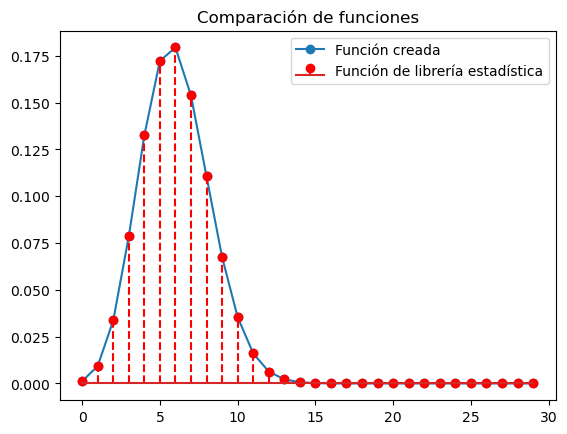

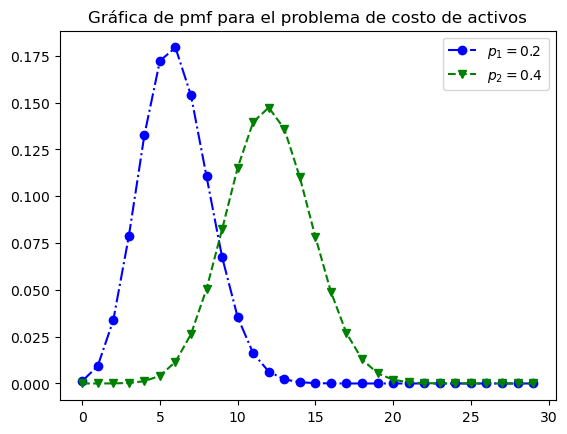

In [3]:
# Parámetros de la distribución 
n = 30; p1=0.2; p2 = 0.4

m = np.arange(0,n)
n = n*np.ones(len(m))
# Distribución binomial creada
P = lambda p,n,m:comb(n,m)*p**m*(1-p)**(n-m)

# Distribución binomial del paquete de estadística
P2 = st.binom(n,p1).pmf(m)

# Comparación de función creada con función de python
plt.plot(P(p1,n,m),'o-',label='Función creada')
plt.stem(P2,'r--',label='Función de librería estadística')
plt.legend()
plt.title('Comparación de funciones')
plt.show()

# Grafica de pmf para el problema de costo de activos
plt.plot(P(p1,n,m),'o-.b',label='$p_1 = 0.2$')
plt.plot(st.binom(n,p2).pmf(m),'gv--',label='$p_2 = 0.4$')
plt.legend()
plt.title('Gráfica de pmf para el problema de costo de activos')
plt.show()

## Ejercicio
<font color='red'>Problema referencia: Introduction to Operations Research,(Chap.10.1, pag.471 and 1118)
> Descargar ejercicio de el siguiente link
> https://drive.google.com/file/d/19GvzgEmYUNXrZqlmppRyW5t0p8WfUeIf/view?usp=sharing

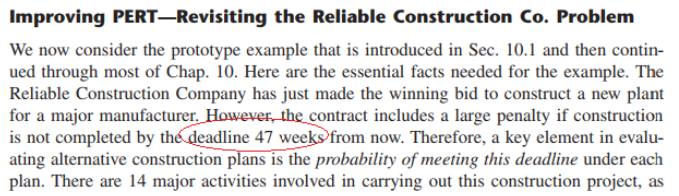

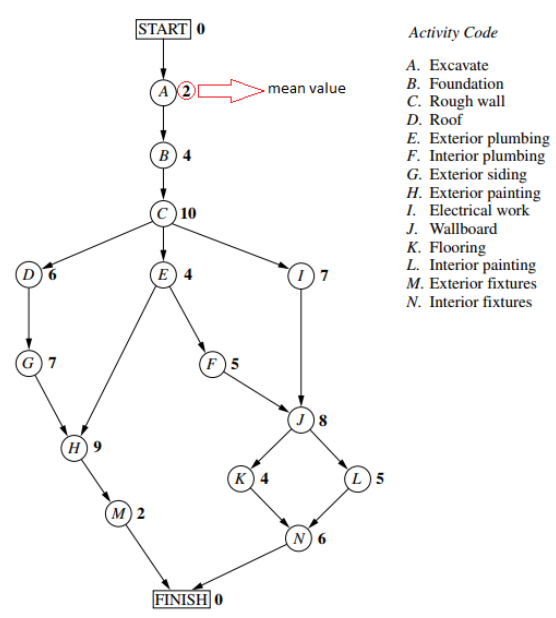

### Recordar de la distribución normal
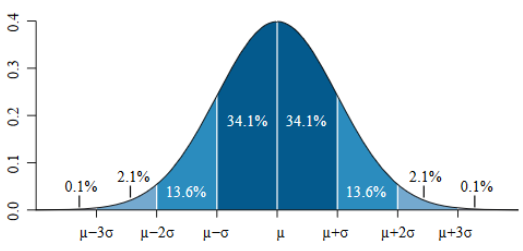

### El Teorema del Límite Central
El Teorema del límite central establece que bajo ciertas condiciones (como pueden ser independientes e idénticamente distribuidas con varianza finita), la suma de un gran número de variables aleatorias se distribuye aproximadamente como una normal. **(Hablar de la importancia del uso)**

In [4]:
np.mean([21, 22, 23, 25, 50])

28.2

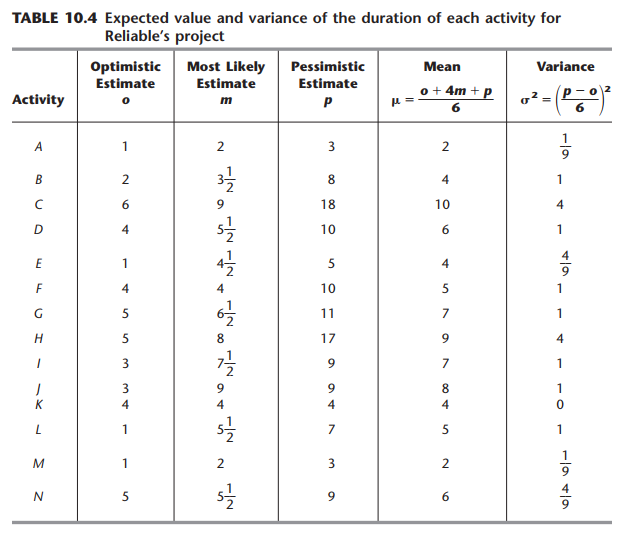

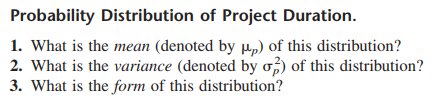

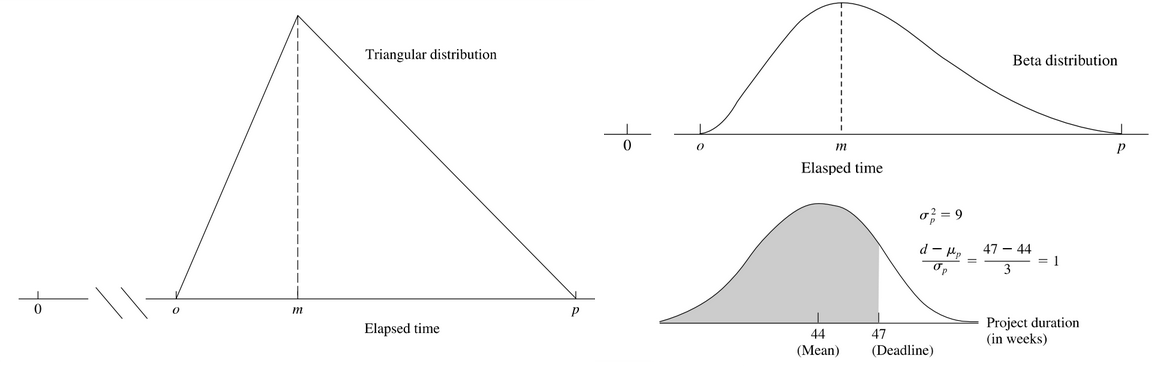

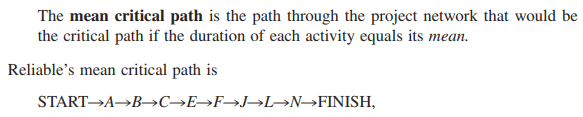

**Pessimistic case**
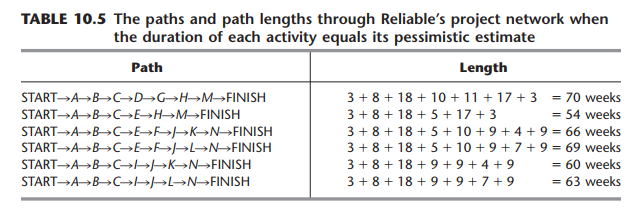

**Possibilities: Most likely**
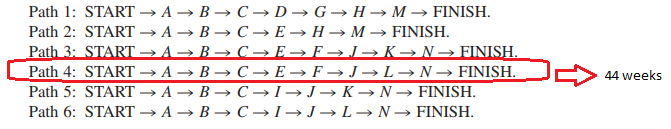

**Optimistic case**
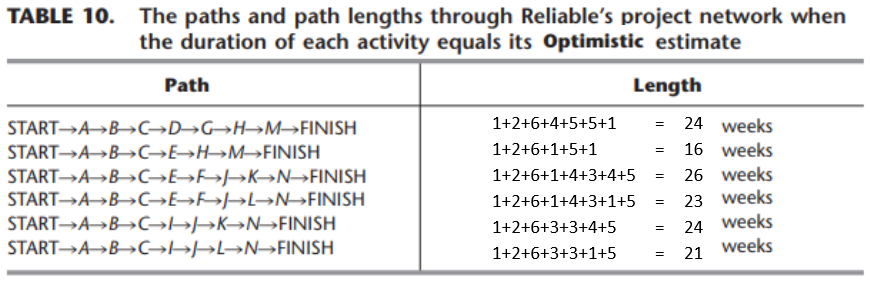

## **Approximations**

1. **Simplifying Approximation 1:** Assume that the mean critical path will turn out to be the longest path through the project network.
2. **Simplifying Approximation 2:** Assume that the durations of the activities on the mean critical path are statistically independent

> **Recordar la expresión de la varianza de dos o más variables aleatorias**
> $$\operatorname {var} (X+Y)= \operatorname {var} (X)+\operatorname {var} (Y)+2 \operatorname {cov}(X,Y) $$

$$\mu_p \longrightarrow \text{Use the approximation 1}$$
$$\sigma_p \longrightarrow \text{Use the approximation 1,2}$$

**Choosing the mean critical path**
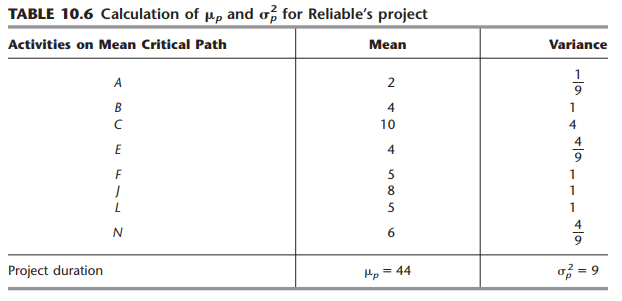

3. **Simplifying Approximation 3:** Assume that the form of the probability distribution of project duration is a `normal distribution`. By using simplifying approximations 1 and 2, one version of the central limit theorem justifies this assumption as being a reasonable approximation if the number of activities on the mean critical path is not too small (say, at least 5). The approximation becomes better as this number of activities increases.

### Casos de estudio
Se tiene entonces la variable aleatoria $T$ la cual representa la duración del proyecto en semanas con media $\mu_p$ y varianza $\sigma_p^2$ y $d$ representa la fecha límite de entrega del proyecto, la cual es de 47 semanas.
1. Suponer que $T$ distribuye normal y responder cual es la probabilidad $P(T\leq d)$.

In [4]:
######### Caso de estudio 1 ################
up = 44; 
sigma = np.sqrt(9); 
d = 47
P = st.norm(up, sigma).cdf(d)
print('P(T<=d)=',P)
# P2 = st.beta(a, b).cdf(d)

P(T<=d)= 0.8413447460685429


>## <font color = 'red'> Ejercicio 

>0. Leer el notebook `Clase11-2_DistribucionesProbabilidad.ipynb` alojado en el repositorio del curso.
    
>1.Suponer que $T$ distribuye beta donde la media es $\mu_p$ y varianza $\sigma_p^2$ y responder cual es la probabilidad $P(T\leq d)$.
    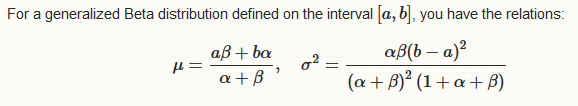

> **Ayuda**: - Aprender a utlizar el solucionador de ecuaciones no lineales https://stackoverflow.com/questions/19843116/passing-arguments-to-fsolve
- Leer el help de la función beta del paquete estadístico para aprender a graficar funciones beta en un intervalo diferente a 0 y 1.

>2.Suponer que $T$ distribuye triangular donde el valor mas probable es $\mu_p$ el valor pesimista es $p=49$ y el valor optimista es $o=40$ y responder cual es la probabilidad $P(T\leq d)$. Nuevamente aprender a graficar una función triangular en un intervalro [a,b], usando el help.
 

## (no deben de entregar nada)

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Oscar David Jaramillo Zuluaga
</footer>